In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as st

In [2]:
#df1 = pd.read_csv("Summary File for Analysis.csv")
df1 = pd.read_csv('Resources/Summary File.csv', index_col=0)
df1.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Factors,,,,,,,,,,,
GDPCA,15626.028999999999,15604.687,15208.833999999999,15598.753,15840.663999999999,16197.007,16495.369,16912.038,17403.843,17688.89,18108.082
"Highway, total","3,031,124","2,976,528","2,956,764","2,967,266","2,950,402","2,969,433","2,988,280","3,025,656","3,095,373","3,174,408","3,212,347"
Average U.S. light duty vehicle fuel efficiency (mpg) (calendar year),21.3,21.8,21.7,21.5,21.4,21.5,21.6,21.4,22.0,22.0,22.3
PAACD,20.83,25.62,17.9,21.54,27.55,28.41,27.74,26.73,19.16,16.7,18.92
PAACB,28034208.0,26630325.0,25814788.0,26190308.0,25785221.0,25272366.0,25650321.0,26034264.0,26420723.0,26958202.0,27144978.0


In [3]:
#swap column for index 
df2 = df1.transpose()
df2.head()

Factors,GDPCA,"Highway, total",Average U.S. light duty vehicle fuel efficiency (mpg) (calendar year),PAACD,PAACB
2007,15626.028999999999,"3,031,124",21.3,20.83,28034208.0
2008,15604.687,"2,976,528",21.8,25.62,26630325.0
2009,15208.833999999999,"2,956,764",21.7,17.9,25814788.0
2010,15598.753,"2,967,266",21.5,21.54,26190308.0
2011,15840.663999999999,"2,950,402",21.4,27.55,25785221.0


In [4]:
df2['Highway, total'] = df2['Highway, total'].str.replace(',','')
df2.head()

Factors,GDPCA,"Highway, total",Average U.S. light duty vehicle fuel efficiency (mpg) (calendar year),PAACD,PAACB
2007,15626.028999999999,3031124,21.3,20.83,28034208.0
2008,15604.687,2976528,21.8,25.62,26630325.0
2009,15208.833999999999,2956764,21.7,17.9,25814788.0
2010,15598.753,2967266,21.5,21.54,26190308.0
2011,15840.663999999999,2950402,21.4,27.55,25785221.0


In [5]:
#make into numbers
df2.apply(pd.to_numeric)

Factors,GDPCA,"Highway, total",Average U.S. light duty vehicle fuel efficiency (mpg) (calendar year),PAACD,PAACB
2007,15626.029,3031124,21.3,20.83,28034208.0
2008,15604.687,2976528,21.8,25.62,26630325.0
2009,15208.834,2956764,21.7,17.90,25814788.0
2010,15598.753,2967266,21.5,21.54,26190308.0
2011,15840.664,2950402,21.4,27.55,25785221.0
2012,16197.007,2969433,21.5,28.41,25272366.0
2013,16495.369,2988280,21.6,27.74,25650321.0
2014,16912.038,3025656,21.4,26.73,26034264.0
2015,17403.843,3095373,22.0,19.16,26420723.0
2016,17688.890,3174408,22.0,16.70,26958202.0


In [6]:
# df3=df2.astype('float').dtypes
#assing to a variable to save it 
#try pd.DataFrame(df2)
#could also try df.to_numeric()
#df2.head()

In [7]:
df2.rename(columns={'Factors':'Year', "GDPCA":'GDP', "Highway, total":'Total Miles', "Average U.S. light duty vehicle fuel efficiency (mpg) (calendar year)":'MPG', "PAACD":'PAACD', "PAACB":'PAACB'}, inplace=True)
df2.head()

Factors,GDP,Total Miles,MPG,PAACD,PAACB
2007,15626.028999999999,3031124,21.3,20.83,28034208.0
2008,15604.687,2976528,21.8,25.62,26630325.0
2009,15208.833999999999,2956764,21.7,17.9,25814788.0
2010,15598.753,2967266,21.5,21.54,26190308.0
2011,15840.663999999999,2950402,21.4,27.55,25785221.0


In [8]:
#df3['Consumed TBTU'] = df2['Consumed TBTU']/ (1000)
# df2.dtypes
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
df2['Year'] = years
df2.head()

Factors,GDP,Total Miles,MPG,PAACD,PAACB,Year
2007,15626.028999999999,3031124,21.3,20.83,28034208.0,2007
2008,15604.687,2976528,21.8,25.62,26630325.0,2008
2009,15208.833999999999,2956764,21.7,17.9,25814788.0,2009
2010,15598.753,2967266,21.5,21.54,26190308.0,2010
2011,15840.663999999999,2950402,21.4,27.55,25785221.0,2011


Consolidated Summary File with the following factors:
 - GDPCA (Real GDP)
 - Highway, total (annual miles)
 - Average U.S. light duty vehicle fuel efficiency (mpg) (calendar year)
 - PAACD (All petroleum products average price in the transportation sector; in dollars per million Btu)
 - PAACB (All petroleum products consumed by the transportation sector; in billion Btu)

In [9]:
df2.reset_index(drop=True, inplace=True)
df2
#del df2.index.name
#df2.head()

Factors,GDP,Total Miles,MPG,PAACD,PAACB,Year
0,15626.028999999999,3031124,21.3,20.83,28034208.0,2007
1,15604.687,2976528,21.8,25.62,26630325.0,2008
2,15208.833999999999,2956764,21.7,17.9,25814788.0,2009
3,15598.753,2967266,21.5,21.54,26190308.0,2010
4,15840.663999999999,2950402,21.4,27.55,25785221.0,2011
5,16197.007,2969433,21.5,28.41,25272366.0,2012
6,16495.369,2988280,21.6,27.74,25650321.0,2013
7,16912.038,3025656,21.4,26.73,26034264.0,2014
8,17403.843,3095373,22.0,19.16,26420723.0,2015
9,17688.89,3174408,22.0,16.7,26958202.0,2016


In [10]:
df2.to_csv("Data_Clean",index=False)

In [11]:
file = pd.read_csv("Data_Clean")
file.head()

,GDP,Total Miles,MPG,PAACD,PAACB,Year
0,15626.029,3031124,21.3,20.83,28034208.0,2007
1,15604.687,2976528,21.8,25.62,26630325.0,2008
2,15208.834,2956764,21.7,17.90,25814788.0,2009
3,15598.753,2967266,21.5,21.54,26190308.0,2010
4,15840.664,2950402,21.4,27.55,25785221.0,2011


In [12]:
file.corr()

,GDP,Total Miles,MPG,PAACD,PAACB,Year
GDP,1.000000,0.896597,0.707174,-0.308445,0.226947,0.947161
Total Miles,0.896597,1.000000,0.779332,-0.617035,0.575169,0.753948
MPG,0.707174,0.779332,1.000000,-0.587381,0.249188,0.646506
PAACD,-0.308445,-0.617035,-0.587381,1.000000,-0.573050,-0.209868
PAACB,0.226947,0.575169,0.249188,-0.573050,1.000000,-0.066987
Year,0.947161,0.753948,0.646506,-0.209868,-0.066987,1.000000


based on initial corr - 
GDP relationship with year (GDP Expansion every year)
GDP relationship with total miles (Expanding economy increases miles driven)
GDP negative correlation with PAACD (inverse correlation - economic activty up and fuel price down)
PAACD: negative correlation to everything (strongly with total miles). High price reduced miles
MPG: Possible inverse correlation - MPG increases and cost of fuel decreases (MPG up every but pricing flux)

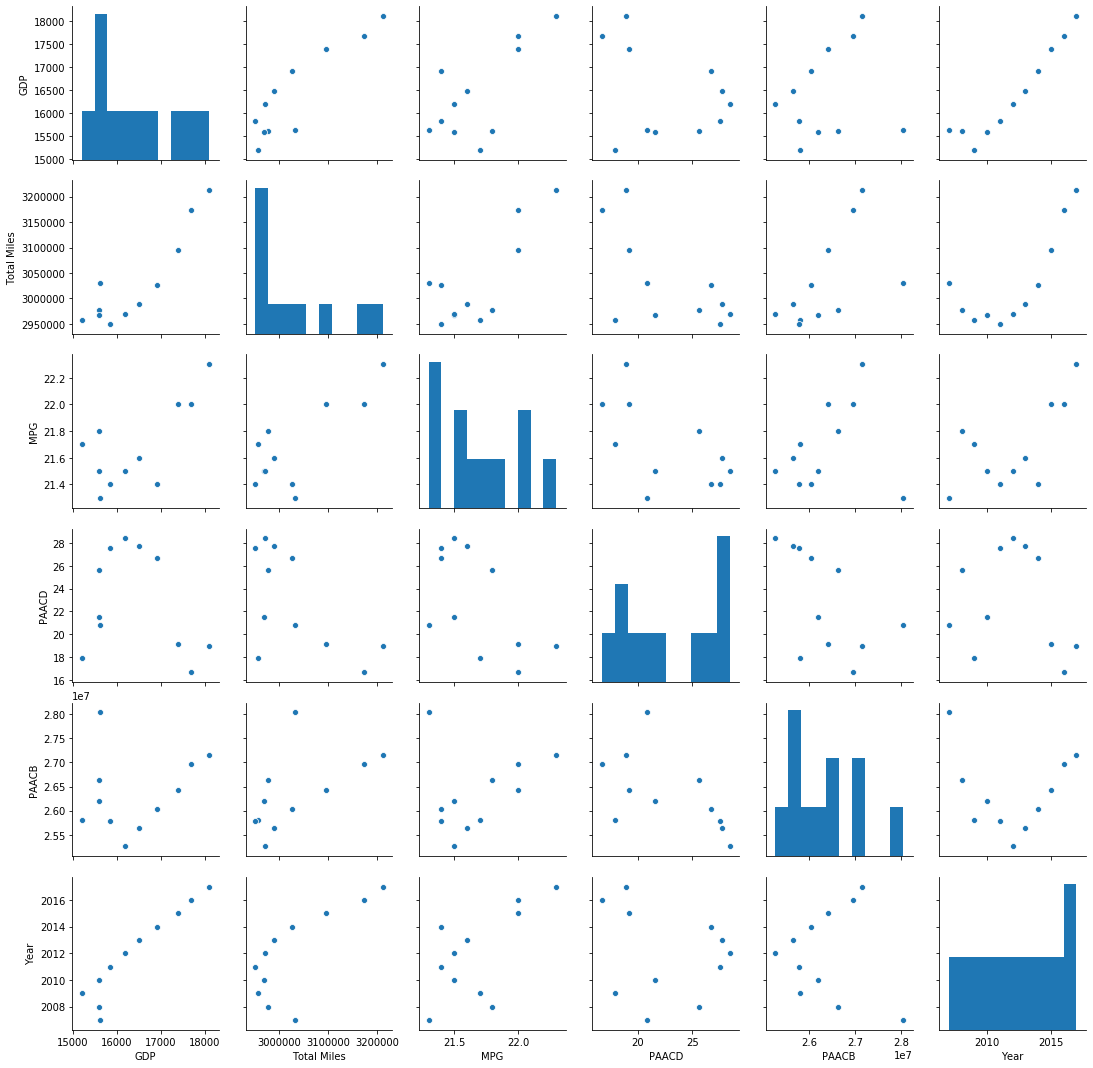

In [13]:
sns.pairplot(file)
#Histrogram along diagnol
#Visually see GDP, Total Miles,PAACB - consumption up and GDP up

In [14]:
cols = file.columns.to_list()
cols.remove('Year')
cols.remove('PAACB')
cols.remove('PAACD')
cols.remove('Total Miles')
cols

['GDP', 'MPG']

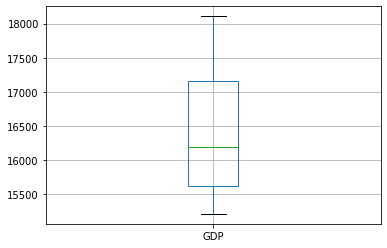

In [15]:
file.boxplot(column=['GDP'])

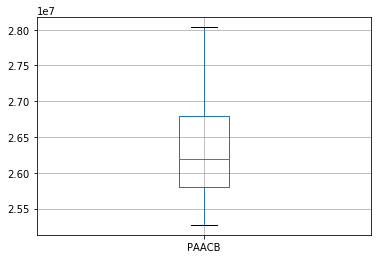

In [16]:
file.boxplot(column=['PAACB'])

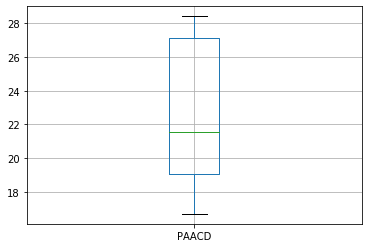

In [17]:
file.boxplot(column=['PAACD'])

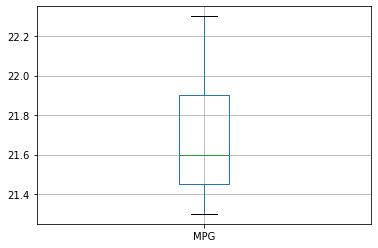

In [18]:
file.boxplot(column=['MPG'])

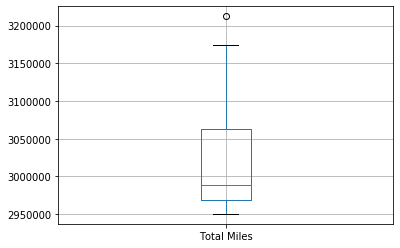

In [19]:
file.boxplot(column=['Total Miles'])

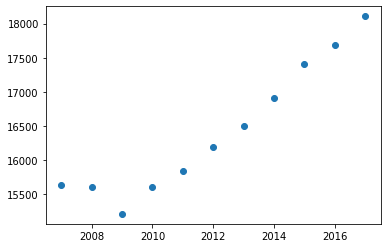

In [20]:
plt.scatter(file['Year'], file['GDP'])

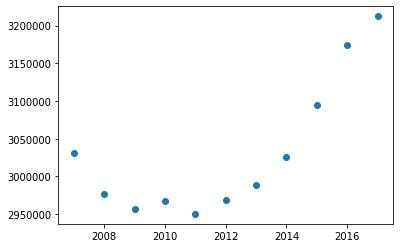

In [21]:
plt.scatter(file['Year'], file['Total Miles'])

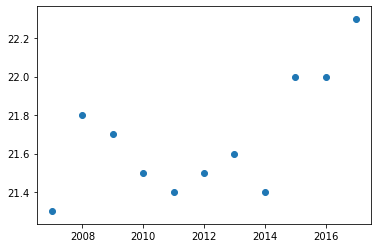

In [22]:
plt.scatter(file['Year'], file['MPG'])

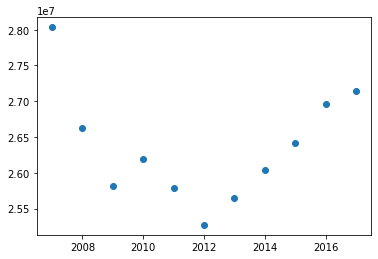

In [23]:
plt.scatter(file['Year'], file['PAACB'])

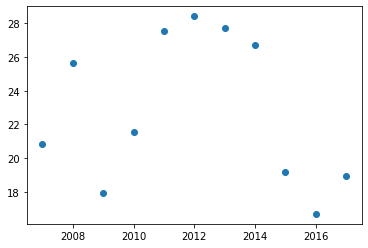

In [24]:
plt.scatter(file['Year'], file['PAACD'])

In [25]:
correlation = st.pearsonr(file['GDP'], file['Total Miles'])
correlation

(0.8965972836472216, 0.00018502781522408842)

In [26]:
regression = st.linregress(file['GDP'], file['Total Miles'])
regression

LinregressResult(slope=83.45157969839758, intercept=1660836.310660465, rvalue=0.8965972836472218, pvalue=0.00018502781522408674, stderr=13.739452422303106)

We see strong correlation with GDP/TOTAL MILES/Price/Consumption - lets look at these further...

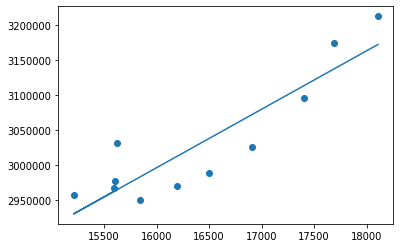

In [27]:
plt.scatter(file['GDP'], file['Total Miles'])
line_regression = file['GDP']*regression[0]+regression[1]
plt.plot(file['GDP'],line_regression)

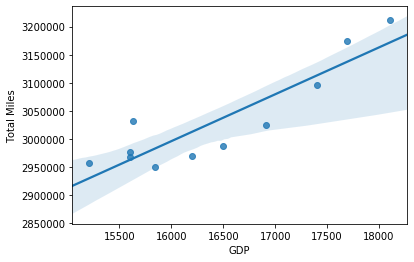

In [28]:
#Similar - but light blue shading provides area of confidence
sns.regplot(file['GDP'], file['Total Miles'])

Michael's Analyses

In [29]:
#linear regression to determine line equation of price to consumption
regression_p_c = st.linregress(file['PAACD'], file['PAACB'])
regression_p_c


LinregressResult(slope=-102547.71291970782, intercept=28698675.883103512, rvalue=-0.5730498267971215, pvalue=0.06535643109877315, stderr=48884.61230851307)

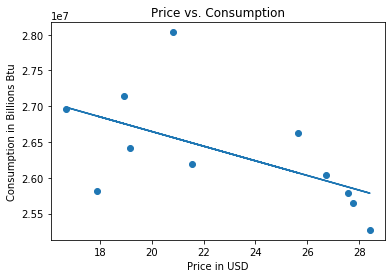

In [30]:
#scatterplot and plot line equation of price to consumption; label and title

plt.scatter(file['PAACD'], file['PAACB'])
line_regression = file['PAACD']*regression_p_c[0]+regression_p_c[1]
plt.plot(file['PAACD'],line_regression)
plt.title('Price vs. Consumption')
plt.xlabel('Price in USD')
plt.ylabel('Consumption in Billions Btu')
plt.savefig('Price vs. Consumption.png')

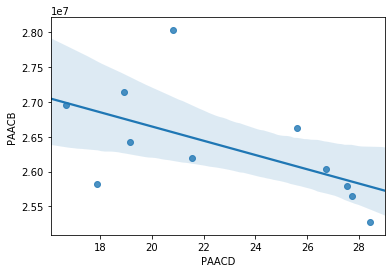

In [31]:
#seaborn regplot of price to consumption showing confidence interval

sns.regplot(file['PAACD'], file['PAACB'])

In [32]:
#ttest for independence between price and consumption

st.ttest_ind(file['PAACD'], file['PAACB'],equal_var=False)

Ttest_indResult(statistic=-110.11258911688023, pvalue=9.355991414485781e-17)

In [33]:
#linear regression of total miles to real GDP

regression_miles_gdp = st.linregress(file['Total Miles'], file['GDP'])
regression_miles_gdp

LinregressResult(slope=0.009632971502144167, intercept=-12777.463767131303, rvalue=0.8965972836472218, pvalue=0.00018502781522408674, stderr=0.0015859706205376101)

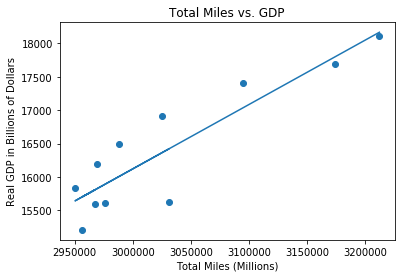

In [34]:
#scatter and plot line of total miles to real GDP

plt.scatter(file['Total Miles'], file['GDP'])
line_regression = file['Total Miles']*regression_miles_gdp[0]+regression_miles_gdp[1]
plt.plot(file['Total Miles'],line_regression)
plt.title('Total Miles vs. GDP')
plt.xlabel('Total Miles (Millions)')
plt.ylabel('Real GDP in Billions of Dollars')
plt.savefig('Total Miles vs. GDP.png')#seaborn regplot with confidence interval of total miles to real GDP


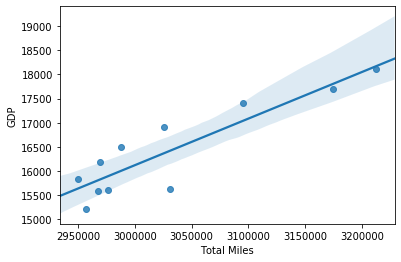

In [35]:
#seaborn regplot with confidence interval of total miles to real GDP

sns.regplot(file['Total Miles'], file['GDP'])

In [38]:
#ttest total miles to real GDP to determine independence

st.ttest_ind(file['Total Miles'], file['GDP'],equal_var=False)

Ttest_indResult(statistic=110.24405379897884, pvalue=9.179181210984754e-17)

Joana's Analyses

In [39]:
#linear regression of consumption to real GDP

regression_cons_gdp = st.linregress(file['PAACB'], file['GDP'])
regression_cons_gdp

LinregressResult(slope=0.0002785786079301166, intercept=9083.119199131059, rvalue=0.22694710927573342, pvalue=0.5021655139887289, stderr=0.00039849179069297795)

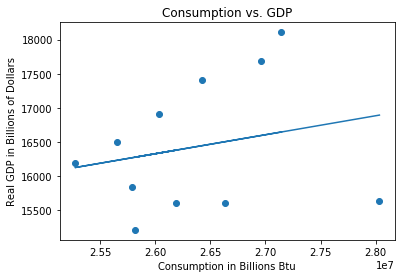

In [40]:
#scatter consumption to real GDP and plot line; title and label

plt.scatter(file['PAACB'], file['GDP'])
line_regression = file['PAACB']*regression_cons_gdp[0]+regression_cons_gdp[1]
plt.plot(file['PAACB'],line_regression)
plt.title('Consumption vs. GDP')
plt.xlabel('Consumption in Billions Btu')
plt.ylabel('Real GDP in Billions of Dollars')
plt.savefig('Consumption vs. GDP.png')

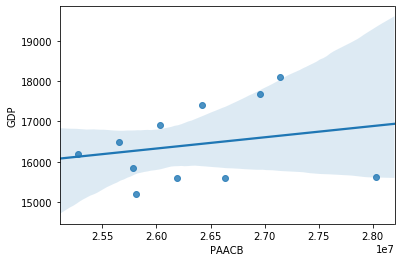

In [41]:
#seaborn regplot consumption to real GDP 

sns.regplot(file['PAACB'], file['GDP'])

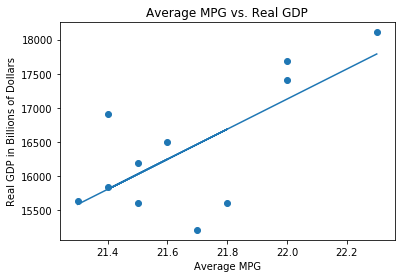

In [42]:
#linear regression of average mpg to real gdp

regression_mpg_gdp = st.linregress(file['MPG'], file['GDP'])
regression_mpg_gdp

#scatter and plot line of average mpg to real gdp, title and label
plt.scatter(file['MPG'], file['GDP'])
line_regression = file['MPG']*regression_mpg_gdp[0]+regression_mpg_gdp[1]
plt.plot(file['MPG'],line_regression)
plt.title('Average MPG vs. Real GDP')
plt.xlabel('Average MPG')
plt.ylabel('Real GDP in Billions of Dollars')
plt.savefig('Average MPG vs. Real GDP.png')

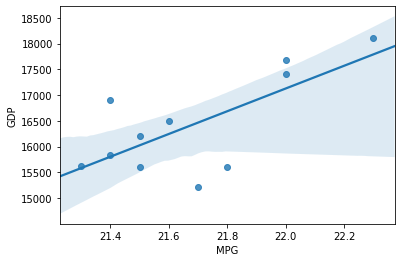

In [43]:
#seaborn regp

sns.regplot(file['MPG'], file['GDP'])

In [44]:
st.ttest_ind(file['MPG'], file['GDP'],equal_var=False)

Ttest_indResult(statistic=-55.82889701626994, pvalue=8.243882048380912e-14)

Tiania's Analysis of Average MPG vs Consumption and Annual Miles

In [45]:
file.head()
file = file.rename(columns = {"PAACB":"Annual Consumption"})
file

,GDP,Total Miles,MPG,PAACD,Annual Consumption,Year
0,15626.029,3031124,21.3,20.83,28034208.0,2007
1,15604.687,2976528,21.8,25.62,26630325.0,2008
2,15208.834,2956764,21.7,17.90,25814788.0,2009
3,15598.753,2967266,21.5,21.54,26190308.0,2010
4,15840.664,2950402,21.4,27.55,25785221.0,2011
5,16197.007,2969433,21.5,28.41,25272366.0,2012
6,16495.369,2988280,21.6,27.74,25650321.0,2013
7,16912.038,3025656,21.4,26.73,26034264.0,2014
8,17403.843,3095373,22.0,19.16,26420723.0,2015
9,17688.890,3174408,22.0,16.70,26958202.0,2016


In [47]:
#PAACB is consumption
#run t test on independent data sets total miles and MPG
tResultConsMPG = st.ttest_ind(file["Annual Consumption"], file["MPG"], equal_var = False)
tResultConsMPG

Ttest_indResult(statistic=110.11259390385818, pvalue=9.355987368199294e-17)

In [48]:
#linregress on consumption and MPG
regressConsMPG = st.linregress(file["Annual Consumption"], file["MPG"])
regressConsMPG

LinregressResult(slope=9.8076397039652e-08, intercept=19.09674097986591, rvalue=0.24918776305177026, pvalue=0.4599535015517744, stderr=1.270562603797687e-07)

Text(0, 0.5, 'Average MPG')

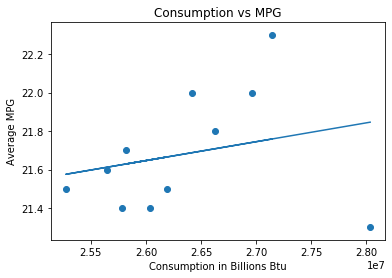

In [49]:
#scatter plot based on consumption and MPG
plt.scatter(file["Annual Consumption"], file["MPG"])
#get line regression formula y = mx+b
linregressConsMPG = file["Annual Consumption"]*regressConsMPG[0]+regressConsMPG[1]
#add line
plt.plot(file["Annual Consumption"], linregressConsMPG)
#label everything
plt.title("Consumption vs MPG")
plt.xlabel("Consumption in Billions Btu")
plt.ylabel("Average MPG")

In [ ]:
#seaborn regplot for consumption vs MPG
sns.regplot(file["Annual Consumption"], file["MPG"])

In [ ]:
#run t test on independent data sets MPG and annual miles
tResultMiMPG = st.ttest_ind(file["Total Miles"], file["MPG"], equal_var = False)
tResultMiMPG

In [ ]:
#run linear regression on miles and MPG
regressMiMPG = st.linregress(file["Total Miles"], file["MPG"])
regressMiMPG

In [ ]:
#scatter plot based on consumption and MPG
plt.scatter(file["Total Miles"], file["MPG"])
#get line regression formula y = mx+b
linregressMiMPG = file["Total Miles"]*regressMiMPG[0]+regressMiMPG[1]
#add line
plt.plot(file["Total Miles"], linregressMiMPG)
#label everything
plt.title("Total Miles vs MPG")
plt.xlabel("Total Miles")
plt.ylabel("Average MPG")

In [ ]:
#seaborn regplot for miles vs MPG
sns.regplot(file["Total Miles"], file["MPG"])